In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')
!pip install pywaffle

In [6]:
df = pd.read_csv("C:/Users/pc/Desktop/AI and ML/ML/Datasets/Stroke Prediction/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [7]:
df.columns, df.stroke, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
        'smoking_status', 'stroke'],
       dtype='object'),
 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 5105    0
 5106    0
 5107    0
 5108    0
 5109    0
 Name: stroke, Length: 5110, dtype: int64,
 None)

## Checking for NULL values

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop(columns=['ever_married', 'work_type'], axis=1)

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Rural,166.29,25.6,formerly smoked,0


In [11]:
print(df['Residence_type'].unique(), df['work_type'].unique(), df['smoking_status'].unique())

['Urban' 'Rural'] ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [12]:
# s = df[['gender', 'age', 'bmi', 'Residence_type', 'smoking_status']].copy()

# gen_type = s.gender.replace({'Male': 0, 'Female': 1, 'Other': -1}).astype(np.uint8)
# # res_type = s.Residence_type.replace({'Rural': 0, 'Urban': 1}).astype(np.uint8)
# # smo_type = s.smoking_status.replace({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': -1}).astype(np.uint8)

# print(res_type, gen_type)
# print(smo_type)

In [13]:
obj_cols = [cols for cols in df.columns if df[cols].dtype == "object"]

df['gender'] = df.gender.replace({'Male': 0, 'Female': 1, 'Other': 2}).astype(np.uint8)
df['Residence_type'] = df.Residence_type.replace({'Rural': 0, 'Urban': 1}).astype(np.uint8)
df['smoking_status'] = df.smoking_status.replace({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': -1}).astype(np.uint8)

print(df['gender'], df['Residence_type'], df['smoking_status'])
# print(smo_type)

0       0
2       0
3       1
4       1
5       0
       ..
5104    1
5106    1
5107    1
5108    0
5109    1
Name: gender, Length: 4909, dtype: uint8 0       1
2       0
3       1
4       0
5       1
       ..
5104    0
5106    1
5107    0
5108    0
5109    1
Name: Residence_type, Length: 4909, dtype: uint8 0         0
2         1
3         2
4         1
5         0
       ... 
5104    255
5106      1
5107      1
5108      0
5109    255
Name: smoking_status, Length: 4909, dtype: uint8


## Data Visualization

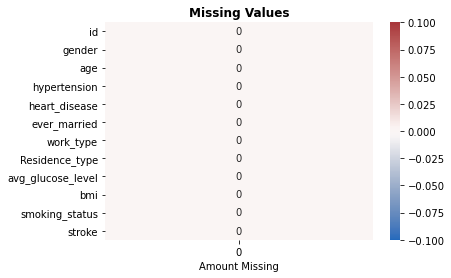

In [14]:
plt.title('Missing Values', fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(), annot = True, fmt = 'd', cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='stroke'>

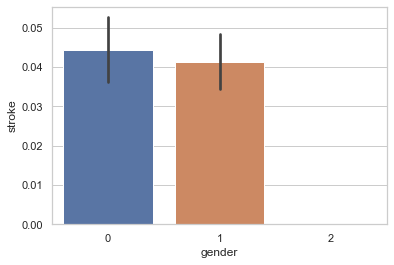

In [15]:
sns.set_theme(style='whitegrid')

sns.barplot(x='gender', y='stroke', data=df)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

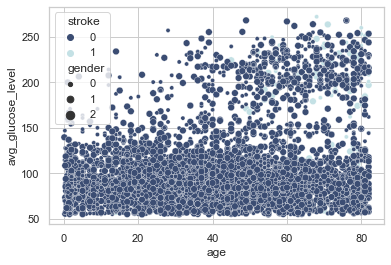

In [16]:
sns.despine(left=True, bottom=True)
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', palette="ch:r=-.2,d=.3_r", size='gender', data=df)

## Modeling

In [17]:
feat = ['age', 'avg_glucose_level', 'gender', 'hypertension', 'heart_disease','smoking_status']

X = df[feat]
y = df['stroke']

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=0)

In [19]:
pipeline_lr = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model_lr', LinearRegression())])

pipeline_lor = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model_lor', LogisticRegression())])

pipeline_dt = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model_dt', DecisionTreeClassifier())])

pipeline_rf = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model_rf', RandomForestClassifier())])

In [20]:
lr_cv = cross_val_score(pipeline_lr, X_train, y_train, cv=10)
lor_cv = cross_val_score(pipeline_lor, X_train, y_train, cv=10)
dt_cv = cross_val_score(pipeline_dt, X_train, y_train, cv=10)
rf_cv = cross_val_score(pipeline_rf, X_train, y_train, cv=10)
print("LinearReg:", lr_cv.mean(), "\nLogisticReg:", lor_cv.mean(), "\nDecisionTreeClass:", dt_cv.mean(), "\nRandomForestClass", rf_cv.mean() )

LinearReg: 0.05901718078487876 
LogisticReg: 0.9577296567481955 
DecisionTreeClass: 0.9238608038635302 
RandomForestClass 0.9523828997247754


In [21]:
pipeline_lor.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model_rf', RandomForestClassifier())])

In [30]:
pred_lor = pipeline_lor.predict(X_val)
pred_dt = pipeline_dt.predict(X_val)
pred_rf = pipeline_rf.predict(X_val)

In [23]:
lor_cm  = confusion_matrix(y_val,pred_lor )
dt_cm = confusion_matrix(y_val,pred_dt)
rf_cm  = confusion_matrix(y_val,pred_rf )

In [36]:
lor_f1  = f1_score(y_val,pred_lor)
dt_f1 = f1_score(y_val,pred_dt)
rf_f1  = f1_score(y_val,pred_rf)

In [39]:
print('Mean f1 scores:')
print('\nRF mean :',rf_f1, '\nDT mean :',dt_f1, '\nLR mean :',lor_f1)

Mean f1 scores:

RF mean : 0.14925373134328357 
DT mean : 0.1678321678321678 
LR mean : 0.17721518987341772


In [24]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_val,pred_lor), 'Accuracy Score: ',accuracy_score(y_val, pred_lor))
print(classification_report(y_val,pred_dt),'Accuracy Score: ',accuracy_score(y_val, pred_dt))
print(classification_report(y_val,pred_rf), 'Accuracy Score: ',accuracy_score(y_val, pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982
 Accuracy Score:  0.9562118126272913
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       939
           1       0.10      0.12      0.11        43

    accuracy                           0.92       982
   macro avg       0.53      0.54      0.53       982
weighted avg       0.92      0.92      0.92       982
 Accuracy Score:  0.9175152749490835
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       939
           1       0.11      0.02      0.04        43

    accuracy                           0.95       982
   macro avg       0.53      0.51      0.51       982
we

## Using SMOTE[Synthetic Minority Over-sampling Technique]

This Technique is use to balance the dataset.

In [25]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


In [26]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [27]:
lr_cv_op = cross_val_score(pipeline_lr, X_train, y_train, cv=10)
lor_cv_op = cross_val_score(pipeline_lor, X_train, y_train, cv=10)
dt_cv_op = cross_val_score(pipeline_dt, X_train, y_train, cv=10)
rf_cv_op = cross_val_score(pipeline_rf, X_train, y_train, cv=10)
print("LinearReg:", lr_cv_op.mean(), "\nLogisticReg:", lor_cv_op.mean(), "\nDecisionTreeClass:", dt_cv_op.mean(), "\nRandomForestClass", rf_cv_op.mean())

LinearReg: 0.05901718078487876 
LogisticReg: 0.9577296567481955 
DecisionTreeClass: 0.9246248117567637 
RandomForestClass 0.9526373526509839


In [28]:
pipeline_lor.fit(X_train_resh,y_train_resh)
pipeline_dt.fit(X_train_resh,y_train_resh)
pipeline_rf.fit(X_train_resh,y_train_resh)

Pipeline(steps=[('scale', StandardScaler()),
                ('model_rf', RandomForestClassifier())])

In [43]:
pred_lor_op = pipeline_lor.predict(X_val)
pred_dt_op = pipeline_dt.predict(X_val)
pred_rf_op = pipeline_rf.predict(X_val)

In [44]:
lor_cm_op  = confusion_matrix(y_val,pred_lor_op)
dt_cm_op = confusion_matrix(y_val,pred_dt_op)
rf_cm_op  = confusion_matrix(y_val,pred_rf_op)

In [45]:
lor_f1_op  = f1_score(y_val,pred_lor_op)
dt_f1_op = f1_score(y_val,pred_dt_op)
rf_f1_op  = f1_score(y_val,pred_rf_op)

In [46]:
print('Mean f1 scores:')

print('\nRF mean :',rf_f1_op, '\nDT mean :',dt_f1_op, '\nLR mean :',lor_f1_op)

Mean f1 scores:

RF mean : 0.14925373134328357 
DT mean : 0.1678321678321678 
LR mean : 0.17721518987341772


In [47]:
print(classification_report(y_val,pred_lor_op), 'Accuracy Score: ',accuracy_score(y_val, pred_lor_op))
print(classification_report(y_val,pred_dt_op),'Accuracy Score: ',accuracy_score(y_val, pred_dt_op))
print(classification_report(y_val,pred_rf_op), 'Accuracy Score: ',accuracy_score(y_val, pred_rf_op))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       939
           1       0.10      0.65      0.18        43

    accuracy                           0.74       982
   macro avg       0.54      0.70      0.51       982
weighted avg       0.94      0.74      0.81       982
 Accuracy Score:  0.7352342158859471
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       939
           1       0.12      0.28      0.17        43

    accuracy                           0.88       982
   macro avg       0.54      0.59      0.55       982
weighted avg       0.93      0.88      0.90       982
 Accuracy Score:  0.8788187372708758
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       939
           1       0.11      0.23      0.15        43

    accuracy                           0.88       982
   macro avg       0.54      0.57      0.54       982
we